In this script we are subsetting the data and resizing the images. Filtering is based on the number of pictures per personality/celebrity. Also we divide our data into train and validation splits.

In [1]:
import numpy as np
import random
import matplotlib.patheffects as PathEffects
%tensorflow_version 2.x
import os
import pickle
import pandas as pd
import seaborn as sns
import shutil
import matplotlib.pyplot as plt
from PIL import Image

TensorFlow 2.x selected.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
# change the path to the zip file
cp gdrive/My\ Drive/lfw-dataset-full.zip .

In [0]:
%%capture
!unzip lfw-dataset-full.zip

In [3]:
df_people = pd.read_csv("people.csv")
df_people_sub = df_people[df_people['images'] > 10]
df_people_sub.reset_index(drop=True)

,name,images
0,Ann_Veneman,11.0
1,Edmund_Stoiber,13.0
2,Gordon_Brown,13.0
3,Gray_Davis,26.0
4,Hugo_Chavez,71.0
...,...,...
138,John_Ashcroft,53.0
139,John_Bolton,17.0
140,Michael_Bloomberg,20.0
141,Michael_Jackson,12.0


In [0]:
path_dataset_full = "/content/lfw-deepfunneled/"
subset_celeb_list = df_people_sub['name'].to_list()

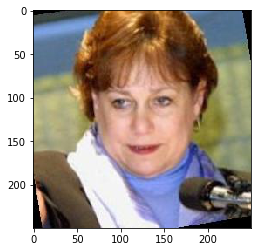

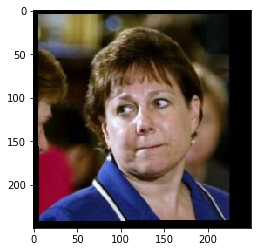

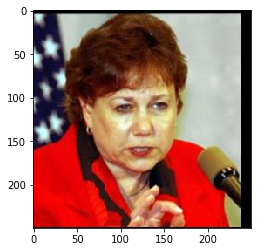

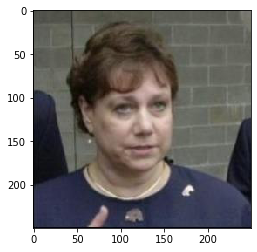

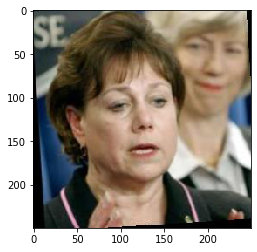

In [24]:
base_folder = os.path.join(path_dataset_full, subset_celeb_list[0])
for image in os.listdir(base_folder)[:5]:
  pil_im = Image.open(os.path.join(base_folder, image)) #Take jpg + png
  im_array = np.asarray(pil_im)
  plt.imshow(im_array)
  plt.show()

In [25]:
im_array.shape

(250, 250, 3)

Creating a new subset with train-test split

In [0]:
path_dataset_subset = '/content/celeb'
os.mkdir(path_dataset_subset)

train_dir = os.path.join(path_dataset_subset, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(path_dataset_subset, 'test')
os.mkdir(test_dir)

In [0]:
TOTAL_IMAGES = 10
TEST_SIZE = 0.2
TRAIN_IMAGES = TOTAL_IMAGES - int(TOTAL_IMAGES*TEST_SIZE)

In [0]:
for celeb in subset_celeb_list:
  train_subdir = os.path.join(train_dir, celeb)
  os.mkdir(train_subdir)
  
  test_subdir = os.path.join(test_dir, celeb)
  os.mkdir(test_subdir)

  celeb_folder_path = os.path.join(path_dataset_full, celeb)
  all_image_paths = os.listdir(celeb_folder_path)[:TOTAL_IMAGES]

  train_split = all_image_paths[:TRAIN_IMAGES]
  test_split = all_image_paths[TRAIN_IMAGES:]
  
  for file in train_split:
    complete_file_path = os.path.join(celeb_folder_path, file)
    shutil.copyfile(complete_file_path, os.path.join(train_subdir, file))
    
  for file in test_split:
    complete_file_path = os.path.join(celeb_folder_path, file)
    shutil.copyfile(complete_file_path, os.path.join(test_subdir, file))


In [0]:
!ls '/content/celeb/train' | wc -l

In [18]:
!ls '/content/celeb/test' | wc -l

143


In [19]:
!ls '/content/celeb/train/Britney_Spears' | wc -l

8


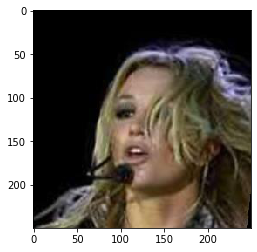

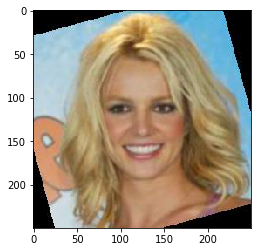

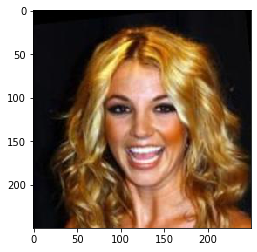

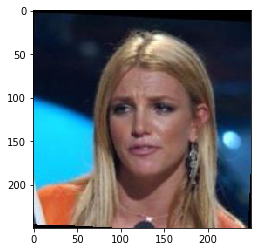

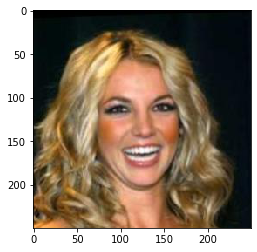

In [27]:
celeb_base_folder = '/content/celeb/train/Britney_Spears'
for image in os.listdir(celeb_base_folder)[:5]:
  pil_im = Image.open(os.path.join(celeb_base_folder, image)) #Take jpg + png
  im_array = np.asarray(pil_im)
  plt.imshow(im_array)
  plt.show()

In [20]:
shutil.make_archive('celeb', 'zip', '/content/celeb')

'/content/celeb.zip'